In [28]:
from glob import glob
import shutil
import cv2
import os
from sklearn.cluster import KMeans
import numpy as np
import matplotlib.pyplot as plt

In [20]:
IMAGE_DIR =  "../../notebook/累積感染者に関する分析/plot_no_xy/*.png"

In [47]:
# 画像をnumpy配列で読み込み、変形
impathlist = glob(IMAGE_DIR)
features = np.array([cv2.resize(cv2.imread(p), (256, 256), cv2.INTER_CUBIC) for p in impathlist])
features = features.reshape(features.shape[0], -1)

In [48]:
# モデルの作成
model = KMeans(n_clusters=5).fit(features)

In [49]:
OUTPUT_DIR =  "../../notebook/累積感染者に関する分析/output"

In [50]:
# クラスタ数を変更して試したいので古い出力結果は消す
for i in range(model.n_clusters):
    cluster_dir = OUTPUT_DIR + "/cluster{}".format(i)
    if os.path.exists(cluster_dir):
        shutil.rmtree(cluster_dir)
    os.makedirs(cluster_dir)

In [51]:
# 結果をクラスタごとにディレクトリに保存
for label, p in zip(model.labels_, impathlist):
    shutil.copyfile(p, OUTPUT_DIR + '/cluster{}/{}'.format(label, p.split('/')[-1]))

# エルボー法による

Text(0, 0.5, 'Distortion')

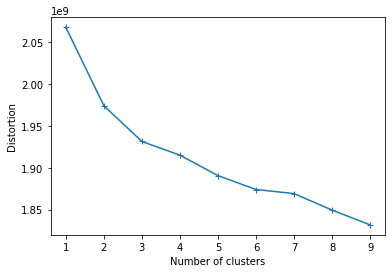

In [45]:
# エルボー方による推定。クラスター数を1から10に増やして、それぞれの距離の総和を求める
dist_list =[]
for i in range(1,10):
    kmeans= KMeans(n_clusters=i, init='random', random_state=0)
    kmeans.fit(features)
    dist_list.append(kmeans.inertia_)
    
# グラフを表示
plt.plot(range(1,10), dist_list,marker='+')
plt.xlabel('Number of clusters')
plt.ylabel('Distortion')

In [46]:
dist_list

[2067865805.0519671,
 1974091520.098577,
 1931346036.3647258,
 1914954806.8691325,
 1890535545.187659,
 1873896025.6260054,
 1869031950.6909084,
 1849287663.1749618,
 1831583080.2220032]

# 参考   
- https://rightcode.co.jp/blog/information-technology/machine-learning-image-clustering